Exploratory Data Analysis of TFT Games

Let's import the CSV file locally and take a quick look at the first five entries.

In [41]:
import pandas as pd

# Import local CSV
df = pd.read_csv('data/tft_games/tft_games_initial_clean.csv', low_memory=False)

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76676 entries, 0 to 76675
Columns: 124 entries, level to unit_3_item_9
dtypes: float64(20), int64(6), object(98)
memory usage: 72.5+ MB


(   level  placement  length  round   queue lobby_rank            augment_1  \
 0     10          2    2193     39  Ranked   Bronze I  theroadlesstraveled   
 1     10          1    2117     35  Ranked   Bronze I         teambuilding   
 2      7          8    1543     23  Ranked  Silver IV    buriedtreasuresii   
 3      7          5    2023     32  Ranked   Bronze I    blisteringstrikes   
 4      8          6    1658     27  Ranked        NaN        pandorasitems   
 
          augment_2        augment_3 trait_1_name  ...  unit_10_item_5  \
 0     jeweledlotus  capriciousforge         sage  ...             NaN   
 1  radiantrefactor       fatedcrown        fated  ...             NaN   
 2      mythiccrown  balancedbudget+       mythic  ...             NaN   
 3       biggrabbag  pandorasitemsii  storyweaver  ...             NaN   
 4     teambuilding     bruisercrest      bruiser  ...             NaN   
 
   unit_14_name  unit_14_star unit_14_item_1  unit_10_item_6 unit_11_item_4  \

The dataset contains 76,676 entries and 103 columns.

First, let's focus on the game-related information, including the player's level, game duration (in seconds), and the number of rounds played, in relation to their placement in each game.

In [55]:
# Summary statistics for level, length_seconds, rounds, and placement
summary_stats = df[['level', 'length', 'round', 'placement', 'lobby_rank']].describe(include = 'all')

# Check for missing values in the relevant columns
missing_values = df[['level', 'length', 'round', 'placement', 'lobby_rank']].isnull().sum()

summary_stats, missing_values


(               level        length         round     placement lobby_rank
 count   76676.000000  76676.000000  76676.000000  76676.000000      75822
 unique           NaN           NaN           NaN           NaN         30
 top              NaN           NaN           NaN           NaN    Gold IV
 freq             NaN           NaN           NaN           NaN       9707
 mean        8.378671   1927.607491     31.103474      4.431321        NaN
 std         0.894662    295.323242      5.899399      2.294478        NaN
 min         4.000000    602.000000      6.000000      1.000000        NaN
 25%         8.000000   1712.000000     27.000000      2.000000        NaN
 50%         8.000000   1950.000000     32.000000      4.000000        NaN
 75%         9.000000   2144.000000     35.000000      6.000000        NaN
 max        10.000000   2914.000000     51.000000      8.000000        NaN,
 level           0
 length          0
 round           0
 placement       0
 lobby_rank    854
 dty

This summary provides a clear overview of each player's game statistics:

    On average, most players reach level 8.
    The typical game consists of about 31 rounds, lasting approximately 1927 seconds (or 32 minutes).
    Players generally finish in 4th place.
    The average lobby rank that was scraped is Gold IV, with an appearance of 9707 times

Only lobby_rank has missing values, mostly likely due to scraping this data at the start of the season, where some in some lobbies, none of the players had a rank.

Our analysis indicates a well-balanced dataset, demonstrating successful data retrieval. 

In [57]:
# Correlation matrix
correlation_matrix = df[['level', 'length', 'round', 'placement']].corr()

correlation_matrix

,level,length,round,placement
level,1.000000,0.551006,0.552140,-0.511905
length,0.551006,1.000000,0.975980,-0.861905
round,0.552140,0.975980,1.000000,-0.874683
placement,-0.511905,-0.861905,-0.874683,1.000000


There is a strong negative correlation between placement and both length_seconds and rounds, indicating that longer games and more rounds are associated with better placements (lower placement values).

There is a moderate negative correlation between level and placement, suggesting that higher levels are linked to better placements.

As expected, there is a strong positive correlation between length_seconds and rounds, since longer games typically have more rounds.

Next, let's create some graphs to visualize these relationships.

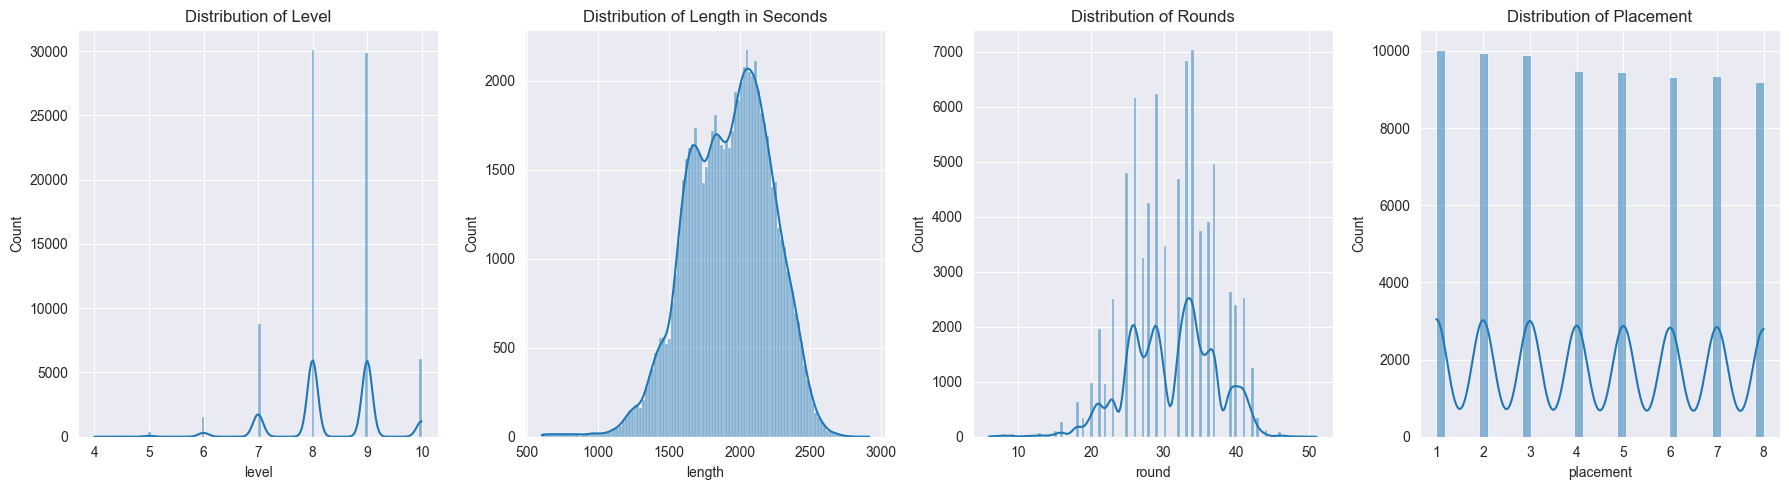

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Distribution plot for level
plt.subplot(1, 4, 1)
sns.histplot(df['level'], kde=True)
plt.title('Distribution of Level')

# Distribution plot for length_seconds
plt.subplot(1, 4, 2)
sns.histplot(df['length'], kde=True)
plt.title('Distribution of Length in Seconds')

# Distribution plot for rounds
plt.subplot(1, 4, 3)
sns.histplot(df['round'], kde=True)
plt.title('Distribution of Rounds')

# Distribution plot for placement
plt.subplot(1, 4, 4)
sns.histplot(df['placement'], kde=True)
plt.title('Distribution of Placement')

plt.tight_layout()
plt.show()


Observations:

    Level: The distribution is slightly right-skewed, with most values concentrated around levels 8 and 9.
    Length in Seconds: The distribution is approximately normal but slightly left-skewed, with most games lasting between 1500 and 2500 seconds.
    Rounds: The distribution is similar to the length in seconds, slightly left-skewed, with most games having between 25 and 40 rounds.

Conclusion:

The majority of games end around levels 8 and 9, last between 1500 and 2500 seconds, and have between 25 and 40 rounds.

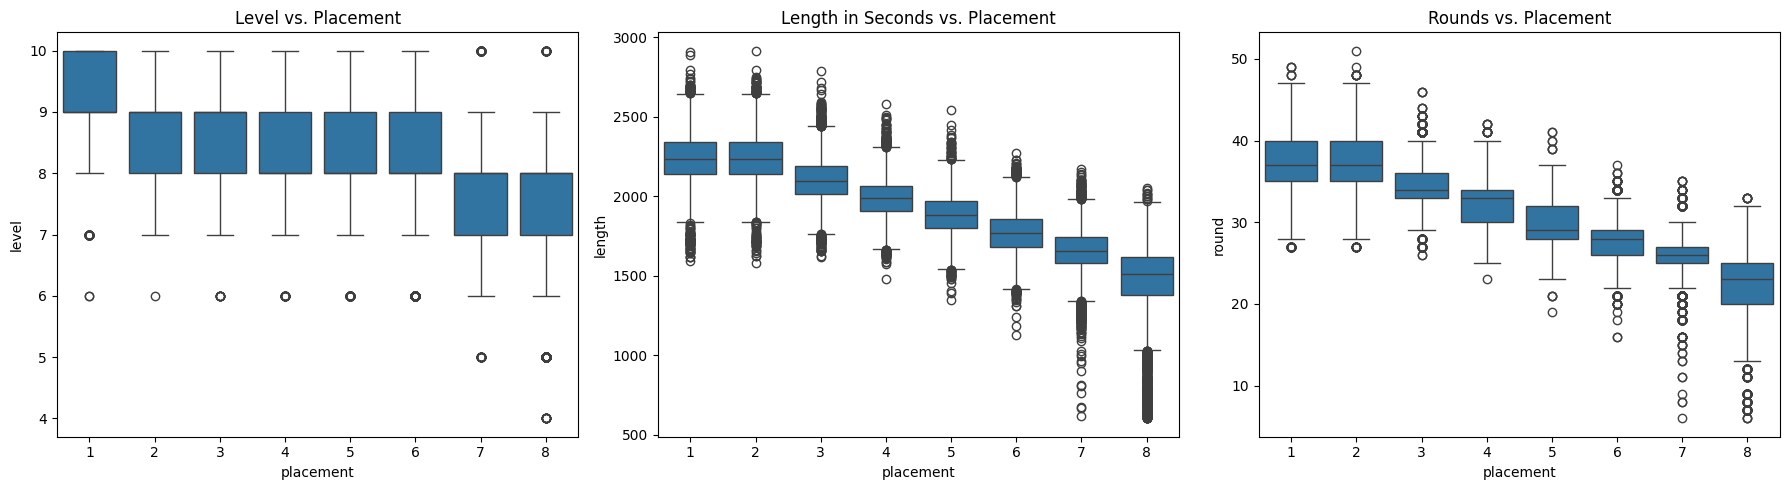

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Box plot for level vs. placement
plt.subplot(1, 3, 1)
sns.boxplot(x='placement', y='level', data=df)
plt.title('Level vs. Placement')

# Box plot for length_seconds vs. placement
plt.subplot(1, 3, 2)
sns.boxplot(x='placement', y='length', data=df)
plt.title('Length in Seconds vs. Placement')

# Box plot for rounds vs. placement
plt.subplot(1, 3, 3)
sns.boxplot(x='placement', y='round', data=df)
plt.title('Rounds vs. Placement')

plt.tight_layout()
plt.show()


Observations:

    Level vs. Placement: Higher placements (lower values) are associated with higher levels, with the median level decreasing as placement increases.
    Length in Seconds vs. Placement: Better placements correspond to longer game durations. The median game length decreases as placement increases.
    Rounds vs. Placement: Better placements are linked to a higher number of rounds. The median number of rounds decreases as placement increases.

Conclusion:

Players who achieve better placements (lower values) tend to reach higher levels, play longer games, and participate in more rounds. There is a clear trend that higher performance (better placement) is associated with higher levels, longer game durations, and more rounds.

Next, let's focus on augments and how they correlate with placements.

In [6]:
# Identify columns related to augments
augment_columns = [col for col in df.columns if 'augment' in col.lower()]

# Summary statistics for augment columns
augment_summary_stats = df[augment_columns].describe(include='all')

augment_na = df[augment_columns].isnull().sum()

augment_summary_stats, augment_na

(               augment_1      augment_2   augment_3
 count              76676          76502       75446
 unique               225            229         196
 top     wanderingtrainer  pandorasitems  biggrabbag
 freq                1793           1756        2292,
 augment_1       0
 augment_2     174
 augment_3    1230
 dtype: int64)

Summary Stat

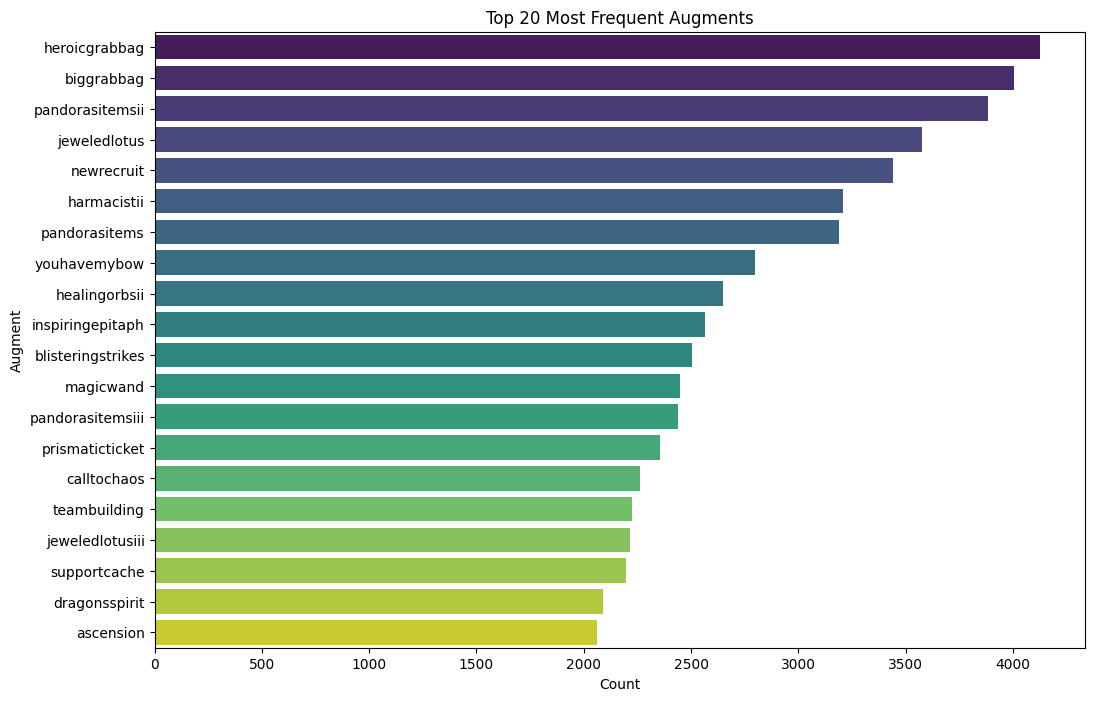

In [7]:
# Concatenate all augment columns into a single series
all_augments = pd.concat([df['augment_1'], df['augment_2'], df['augment_3']])

# Get the top 20 most frequent augments
top_20_augments = all_augments.value_counts().head(20)

# Plot the top 20 augments
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_augments.values, y=top_20_augments.index, hue=top_20_augments.index, palette="viridis")
plt.title('Top 20 Most Frequent Augments')
plt.xlabel('Count')
plt.ylabel('Augment')
plt.show()


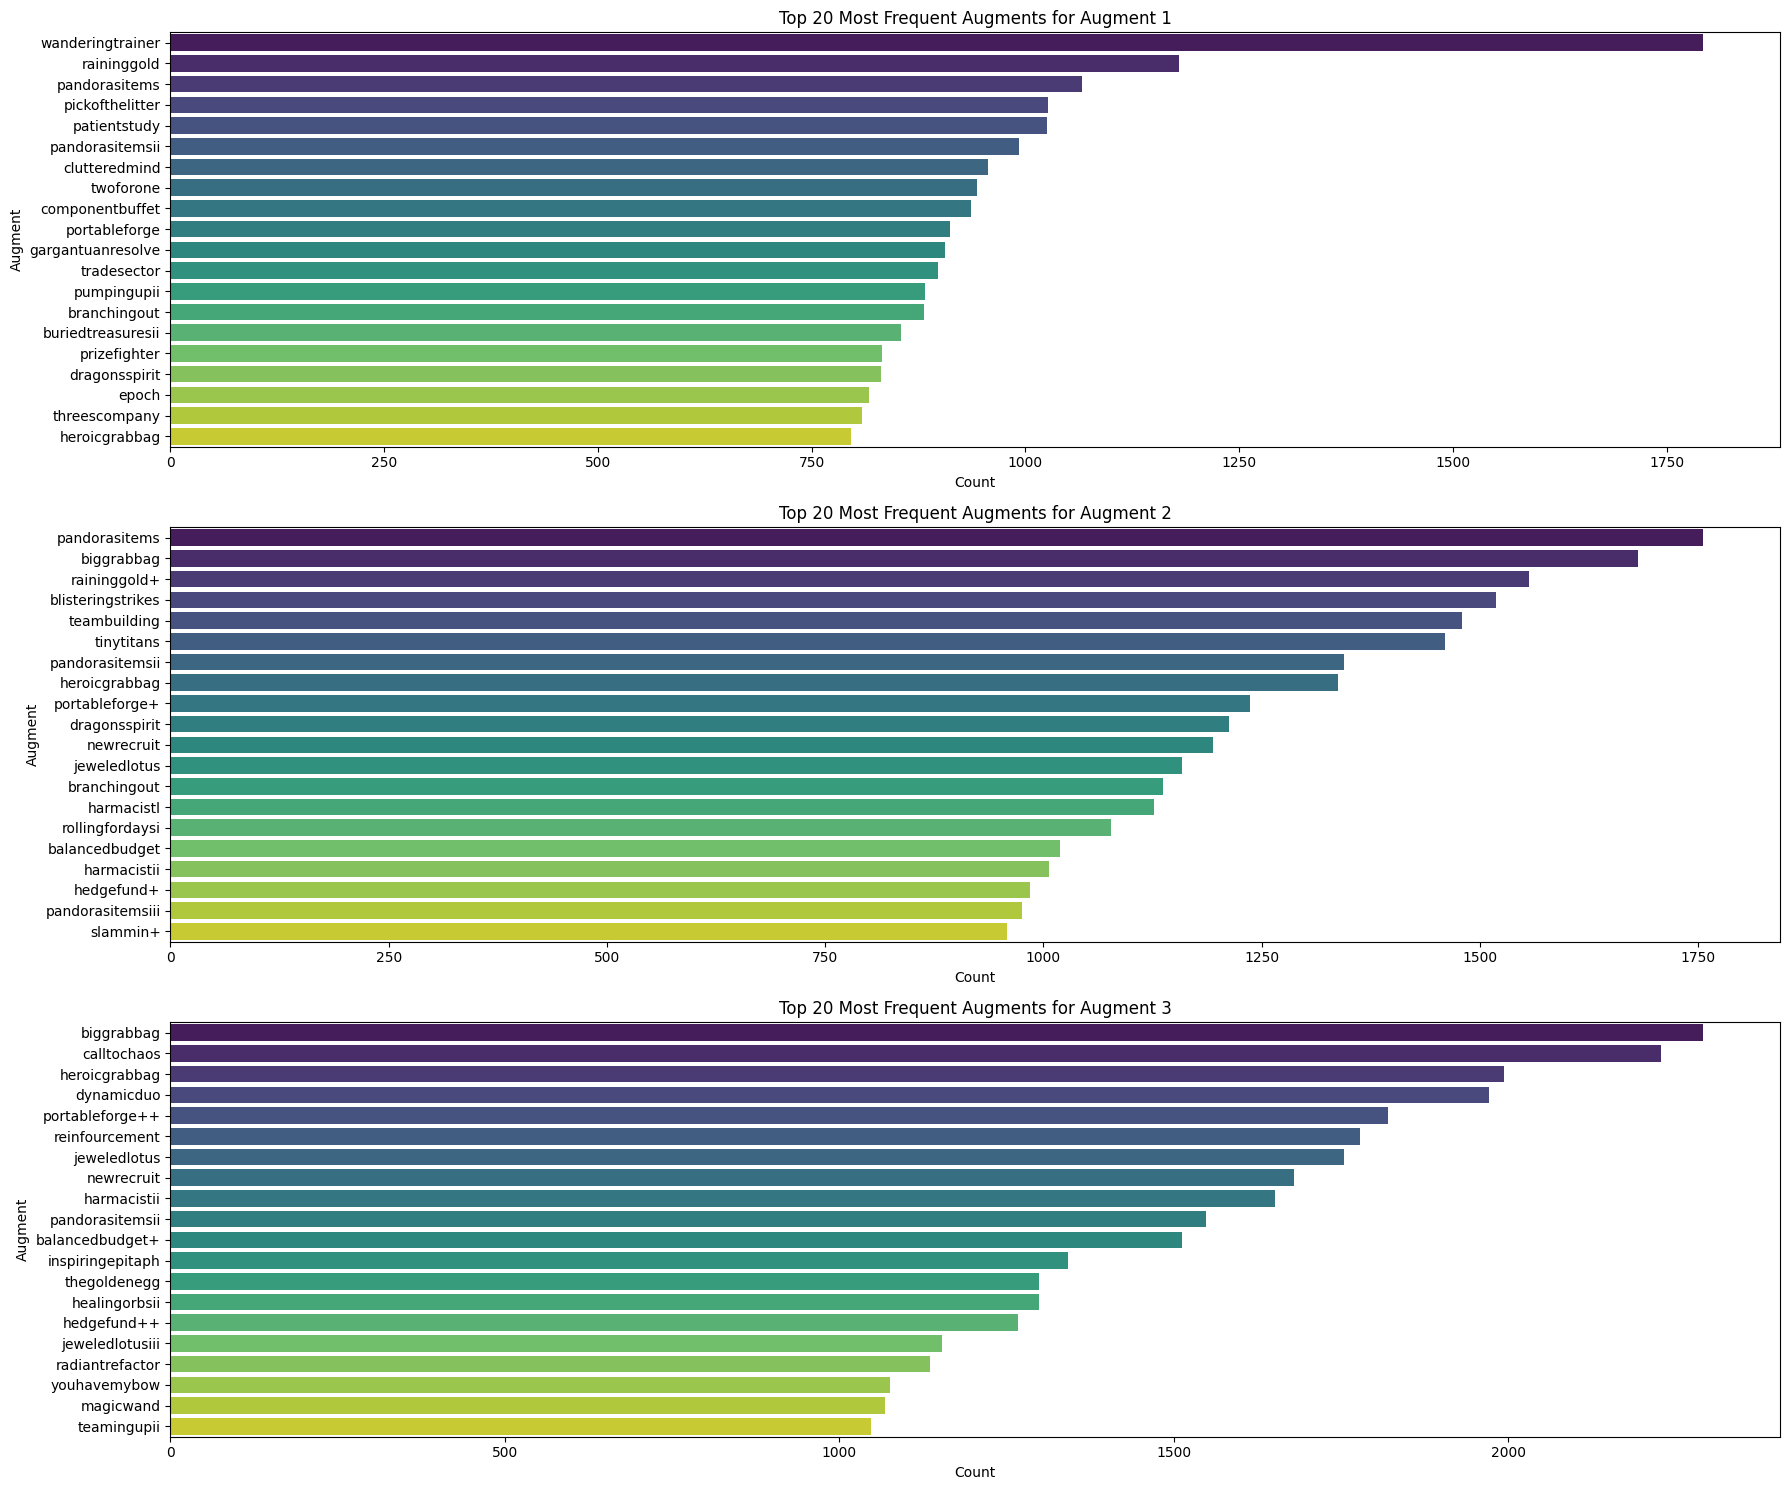

In [8]:
# Top 20 most frequent augments for each augment slot
top_20_augment_1 = df['augment_1'].value_counts().head(20)
top_20_augment_2 = df['augment_2'].value_counts().head(20)
top_20_augment_3 = df['augment_3'].value_counts().head(20)

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Plot the top 20 augments for augment_1
plt.subplot(3, 1, 1)
sns.barplot(x=top_20_augment_1.values, y=top_20_augment_1.index, hue=top_20_augment_1.index, palette="viridis")
plt.title('Top 20 Most Frequent Augments for Augment 1')
plt.xlabel('Count')
plt.ylabel('Augment')

# Plot the top 20 augments for augment_2
plt.subplot(3, 1, 2)
sns.barplot(x=top_20_augment_2.values, y=top_20_augment_2.index, hue=top_20_augment_2.index, palette="viridis")
plt.title('Top 20 Most Frequent Augments for Augment 2')
plt.xlabel('Count')
plt.ylabel('Augment')

# Plot the top 20 augments for augment_3
plt.subplot(3, 1, 3)
sns.barplot(x=top_20_augment_3.values, y=top_20_augment_3.index, hue=top_20_augment_3.index, palette="viridis")
plt.title('Top 20 Most Frequent Augments for Augment 3')
plt.xlabel('Count')
plt.ylabel('Augment')

plt.tight_layout()
plt.show()



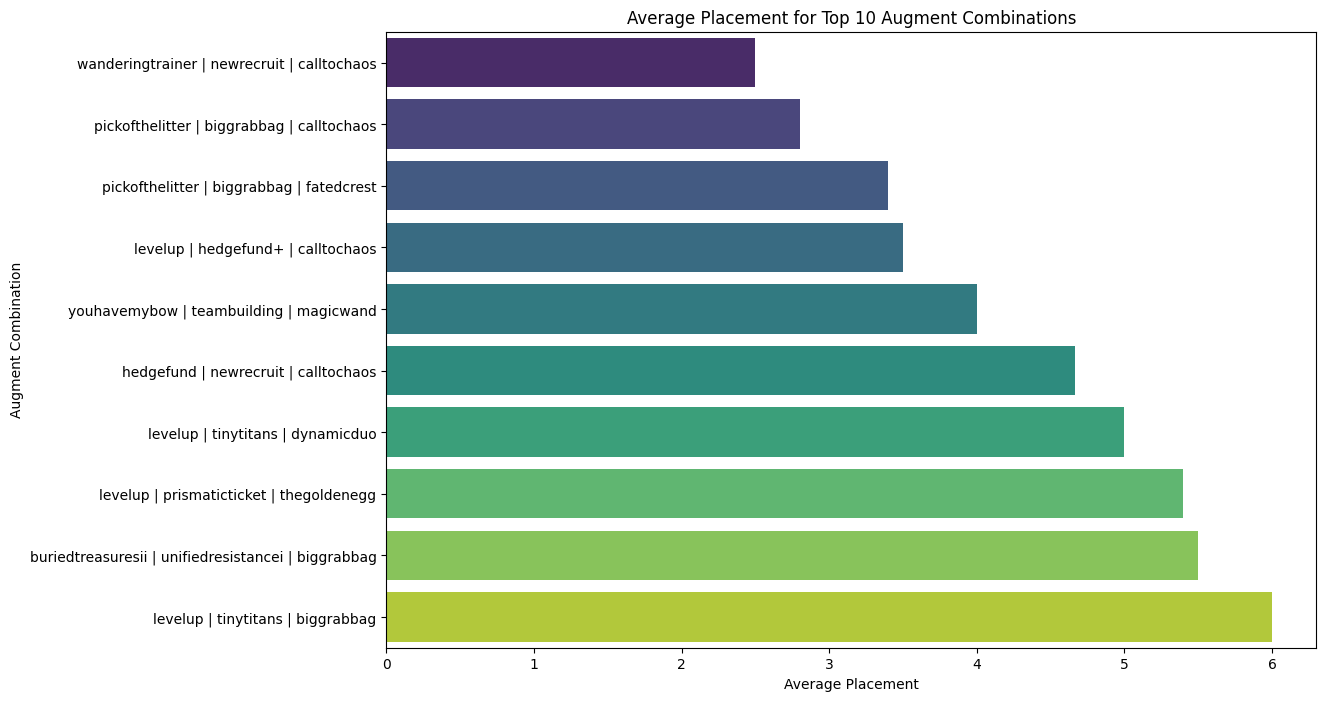

In [9]:
# Create a new column to represent the augment combinations
df['augment_combination'] = df['augment_1'] + ' | ' + df['augment_2'] + ' | ' + df['augment_3']

# Get the top 10 most frequent augment combinations
top_10_combinations = df['augment_combination'].value_counts().head(10).index

# Filter the dataset to only include the top 10 combinations
top_combinations_df = df[df['augment_combination'].isin(top_10_combinations)]

# Calculate the average placement for each of the top 10 combinations
avg_placement_per_combination = top_combinations_df.groupby('augment_combination')['placement'].mean().sort_values()

# Plot the average placement for the top 10 augment combinations
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_placement_per_combination.values, y=avg_placement_per_combination.index, hue=avg_placement_per_combination.index, palette="viridis")
plt.title('Average Placement for Top 10 Augment Combinations')
plt.xlabel('Average Placement')
plt.ylabel('Augment Combination')
plt.show()


Traits

In [10]:
# Extracting trait columns
trait_name_cols = [col for col in df.columns if 'trait_' in col and 'name' in col]
trait_count_cols = [col for col in df.columns if 'trait_' in col and 'count' in col]

# Initialize an empty DataFrame to store combined traits data
combined_traits_data = pd.DataFrame()

# Combine each trait name with its corresponding count and placement
for name_col, count_col in zip(trait_name_cols, trait_count_cols):
    temp_df = df[[name_col, count_col, 'placement']].dropna()
    temp_df.columns = ['trait_name', 'trait_count', 'placement']
    combined_traits_data = pd.concat([combined_traits_data, temp_df])

# Summary statistics for traits columns
traits_summary_stats = df[trait_name_cols].describe(include='all')
traits_na_stats = df[trait_name_cols].isnull().sum()

# Display the summary and missing values for traits
traits_summary_stats, traits_na_stats


(       trait_1_name trait_2_name trait_3_name trait_4_name trait_5_name
 count         76676        76209        72255        63793        50449
 unique           27           27           27           27           27
 top          mythic     arcanist     behemoth        dryad       warden
 freq          10991        10798        12893         6068         5069,
 trait_1_name        0
 trait_2_name      467
 trait_3_name     4421
 trait_4_name    12883
 trait_5_name    26227
 dtype: int64)

In [60]:
# Aggregate the trait data
trait_summary = combined_traits_data.groupby('trait_name')['trait_count'].value_counts().unstack(fill_value=0)

trait_summary

trait_count,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
trait_name,,,,,,,,,
altruist,0,10263,3591,581,0,0,0,0,0
arcanist,0,20858,0,2074,0,1116,0,287,0
artist,7558,0,0,0,0,0,0,0,0
behemoth,0,25439,0,1619,0,738,0,0,0
bruiser,0,21812,0,2972,0,624,0,282,0
dragonlord,0,7572,5084,2234,851,0,0,0,0
dryad,0,11852,0,2332,0,821,0,0,0
duelist,0,7343,0,926,0,2917,0,777,0
exalted,0,0,3723,0,460,0,0,0,0


trait stats

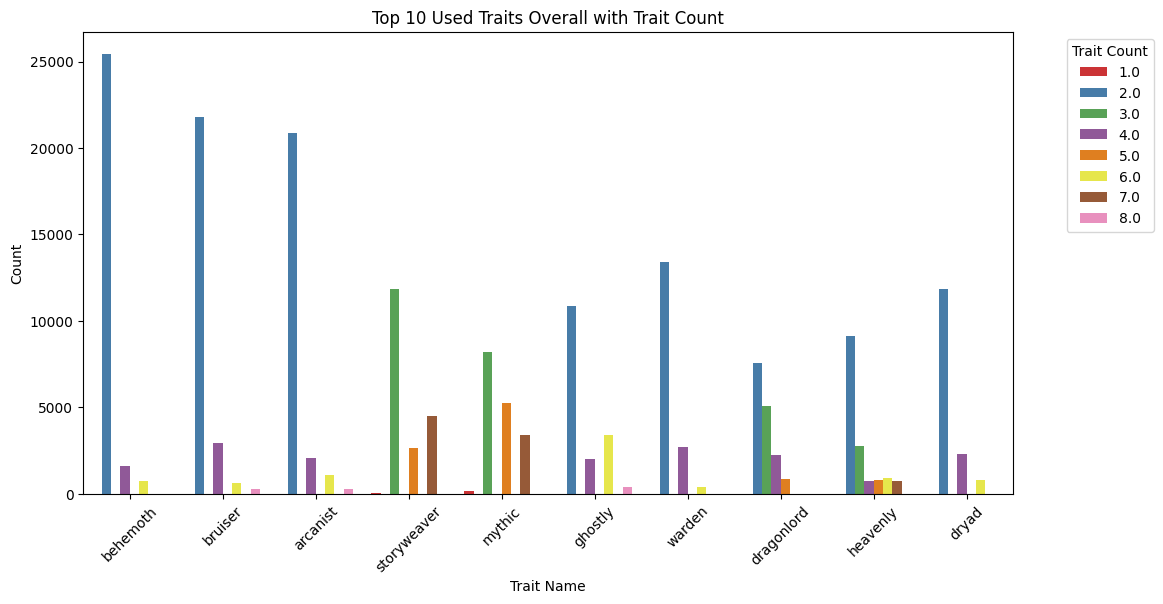

In [11]:
# Identify the top 10 used traits overall
top_traits_overall = combined_traits_data['trait_name'].value_counts().head(10).index
top_traits_data = combined_traits_data[combined_traits_data['trait_name'].isin(top_traits_overall)]

# Plot the top 10 used traits overall
plt.figure(figsize=(12, 6))
sns.countplot(data=top_traits_data, x='trait_name', order=top_traits_overall, hue='trait_count', palette='Set1')
plt.title('Top 10 Used Traits Overall with Trait Count')
plt.xlabel('Trait Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Trait Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Top 10 Used Traits Overall

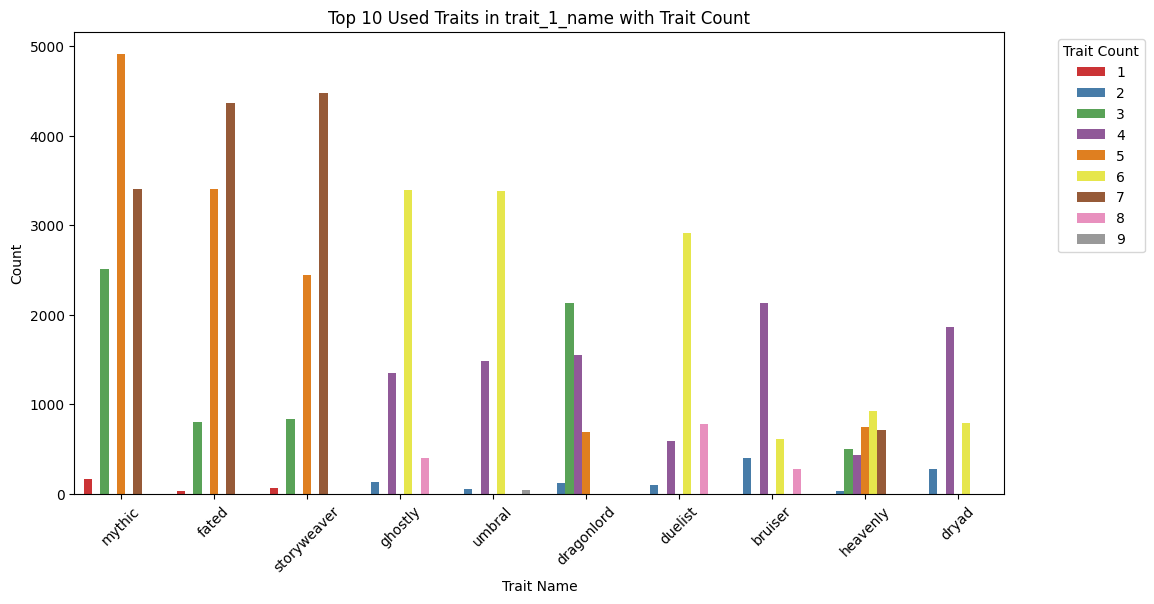

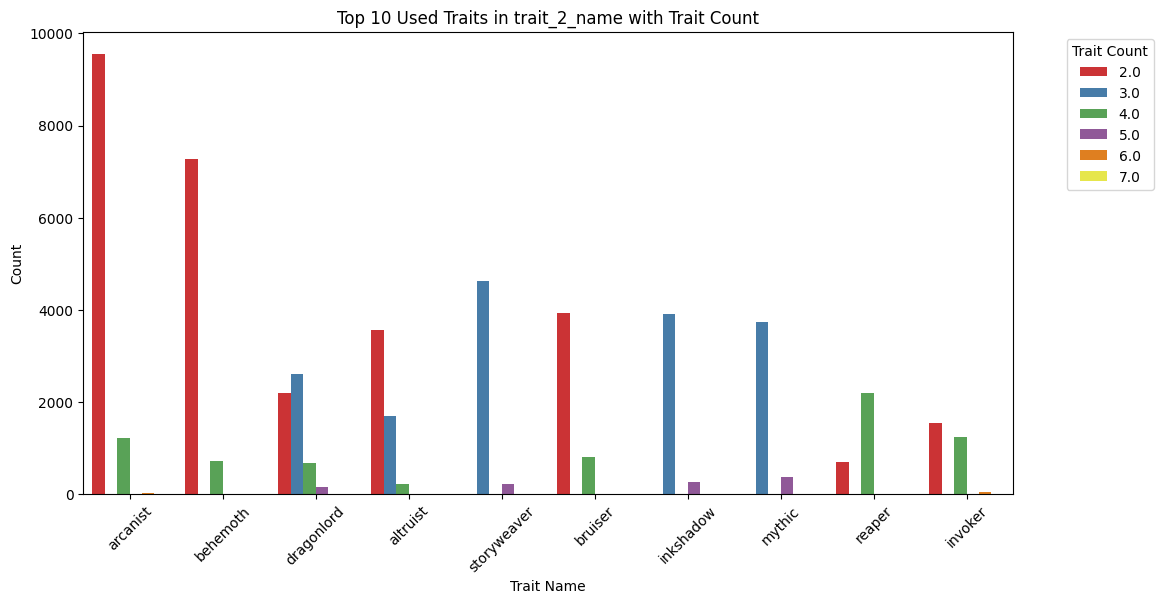

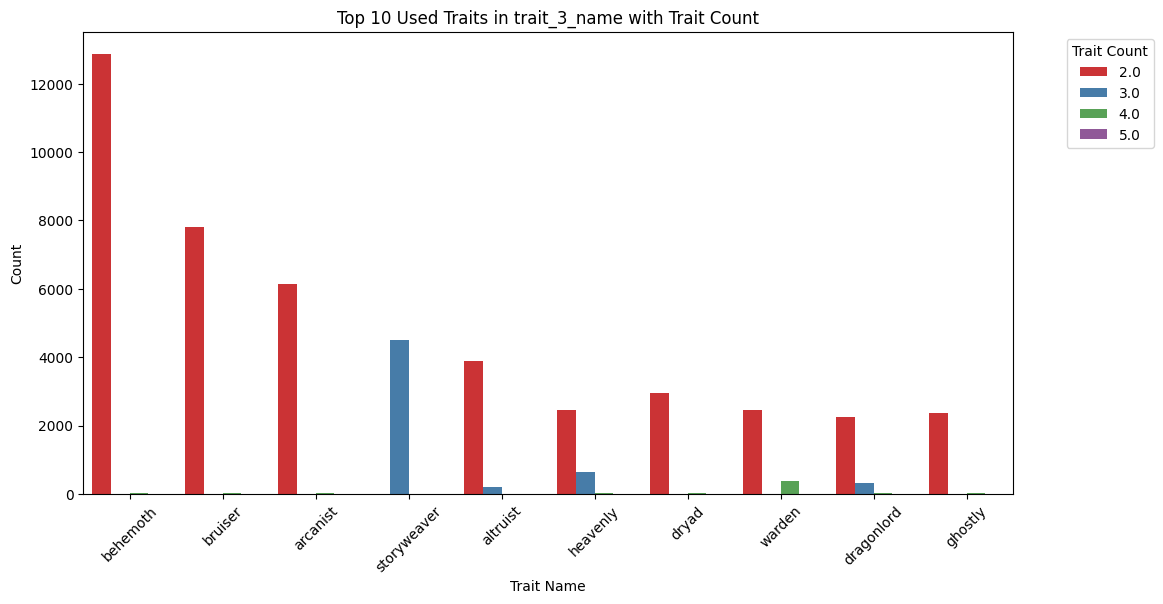

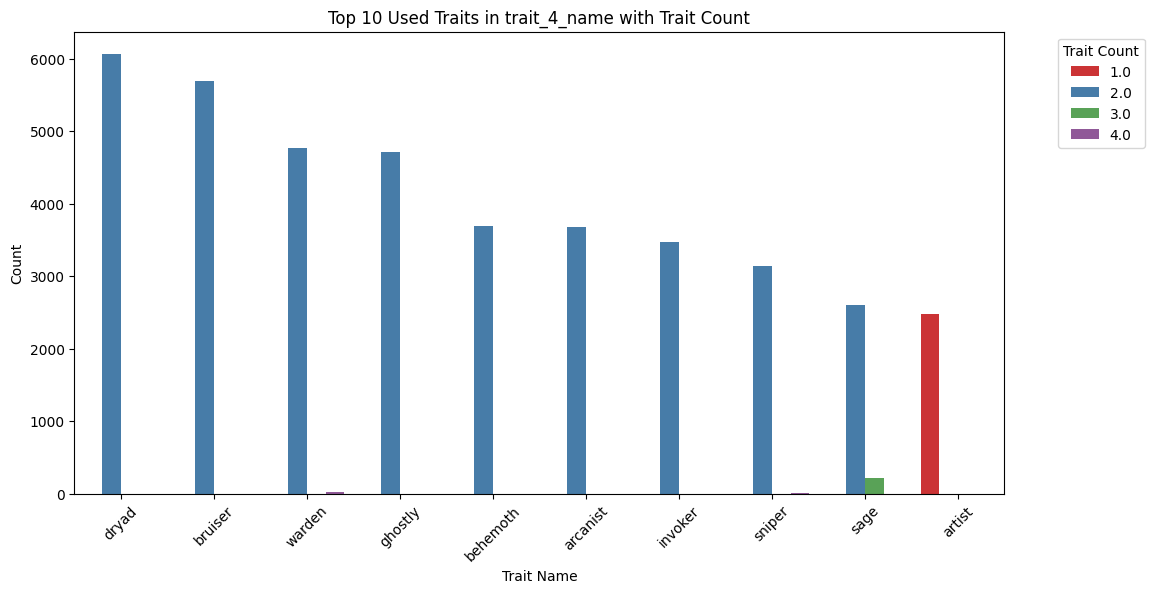

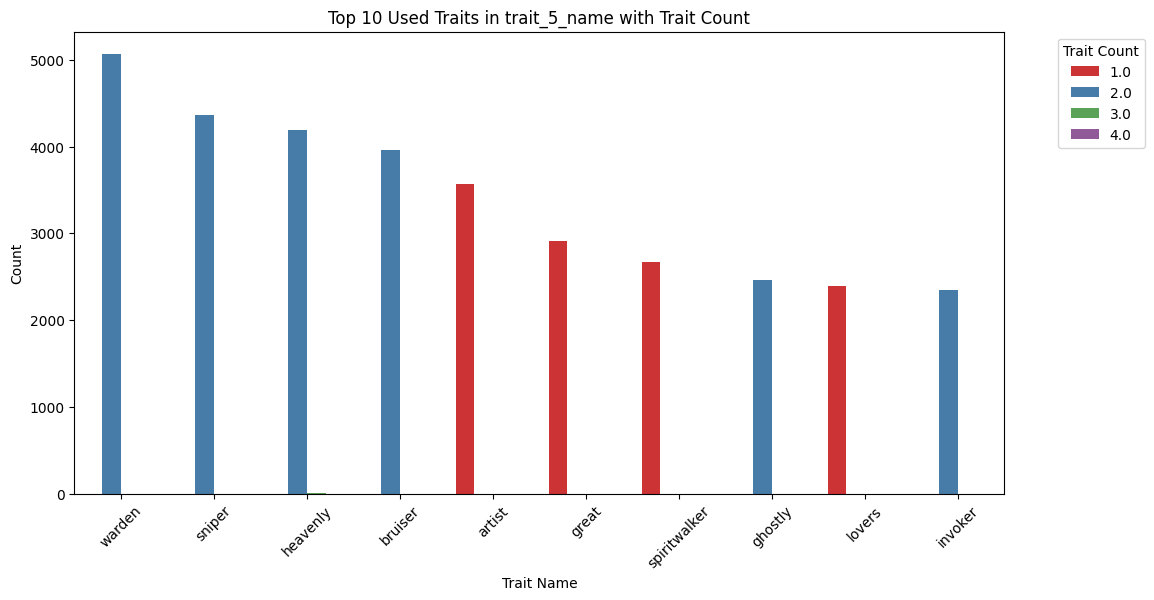

In [12]:
# Function to plot top 10 traits per slot
def plot_top_traits_per_slot_with_hue(name_col, count_col):
    slot_data = df[[name_col, count_col, 'placement']].dropna()
    slot_data.columns = ['trait_name', 'trait_count', 'placement']
    top_slot_traits = slot_data['trait_name'].value_counts().head(10).index
    top_slot_data = slot_data[slot_data['trait_name'].isin(top_slot_traits)]
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=top_slot_data, x='trait_name', order=top_slot_traits, hue='trait_count', palette='Set1')
    plt.title(f'Top 10 Used Traits in {name_col} with Trait Count')
    plt.xlabel('Trait Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Trait Count', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot top 10 traits per slot with hue for trait count
for name_col, count_col in zip(trait_name_cols, trait_count_cols):
    plot_top_traits_per_slot_with_hue(name_col, count_col)


Top 10 Used Traits in Each Trait Slot

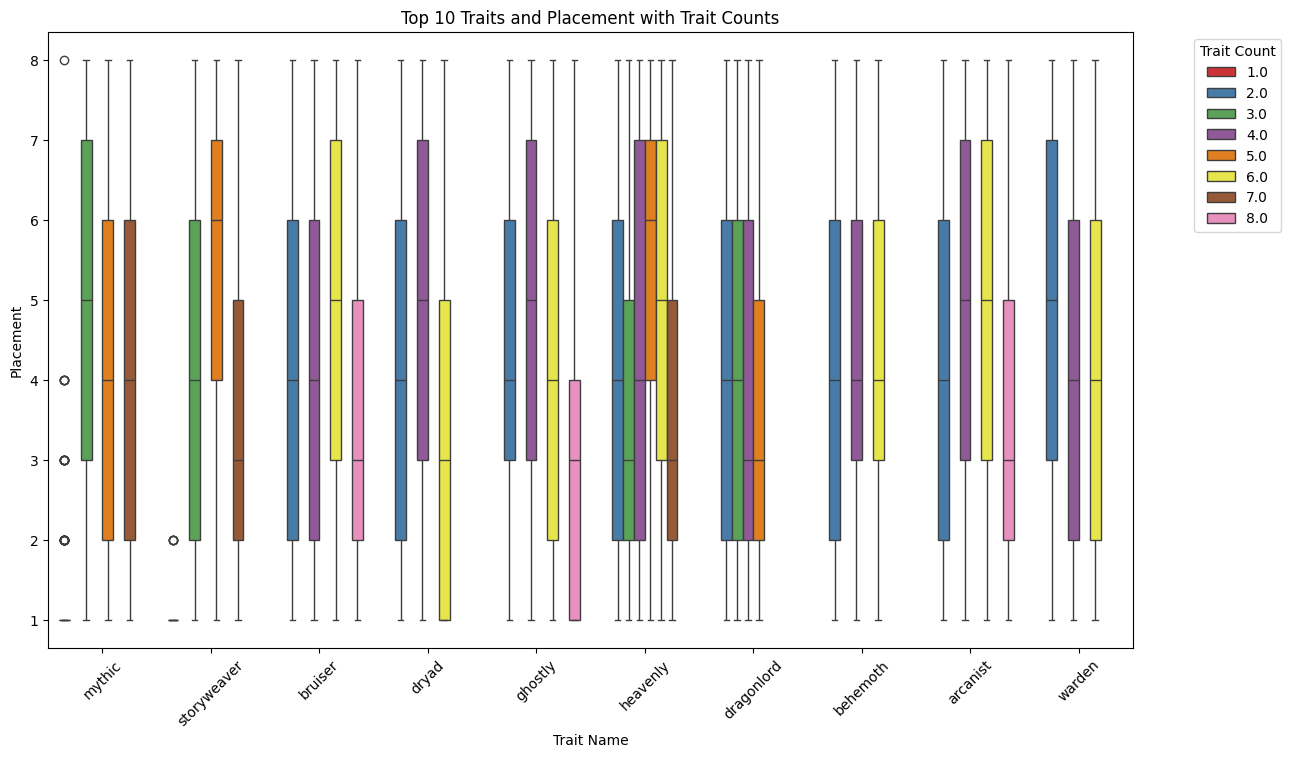

In [13]:
# Analyze the relationship between traits and placement, considering trait counts
top_traits_with_counts = combined_traits_data[combined_traits_data['trait_name'].isin(top_traits_overall)]

# Visualize the relationship between top 10 traits and placement, with trait counts
plt.figure(figsize=(14, 8))
sns.boxplot(data=top_traits_with_counts, x='trait_name', y='placement', hue='trait_count', palette='Set1')
plt.title('Top 10 Traits and Placement with Trait Counts')
plt.xlabel('Trait Name')
plt.ylabel('Placement')
plt.xticks(rotation=45)
plt.legend(title='Trait Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Units

In [14]:
# Extract unit names from the dataset
unit_columns = [col for col in df.columns if 'unit_' in col and 'name' in col]
units = df[unit_columns].apply(pd.Series.value_counts).fillna(0).sum(axis=1).sort_values(ascending=False)

# Summary statistics for units columns
units_summary_stats = df[unit_columns].describe(include='all')
units_na_stats = df[unit_columns].isnull().sum()

# Display the summary and missing values for units
units_summary_stats, units_na_stats

(       unit_1_name unit_2_name unit_3_name unit_4_name unit_5_name  \
 count        76676       76664       76632       76574       76438   
 unique          43          55          58          57          54   
 top         aatrox       galio      illaoi      illaoi        ornn   
 freq         11308        9065        8806        4989        6942   
 
        unit_6_name unit_7_name unit_8_name unit_9_name unit_10_name  \
 count        76031       74389       65480       36901         8222   
 unique          51          45          41          34           30   
 top           sett      soraka        udyr      wukong       wukong   
 freq          5585        5321        6459        5863         1732   
 
        unit_11_name unit_12_name unit_13_name unit_14_name  
 count           716           85            9            1  
 unique           24           13            5            1  
 top            zyra       wukong          zoe         zyra  
 freq            166           19

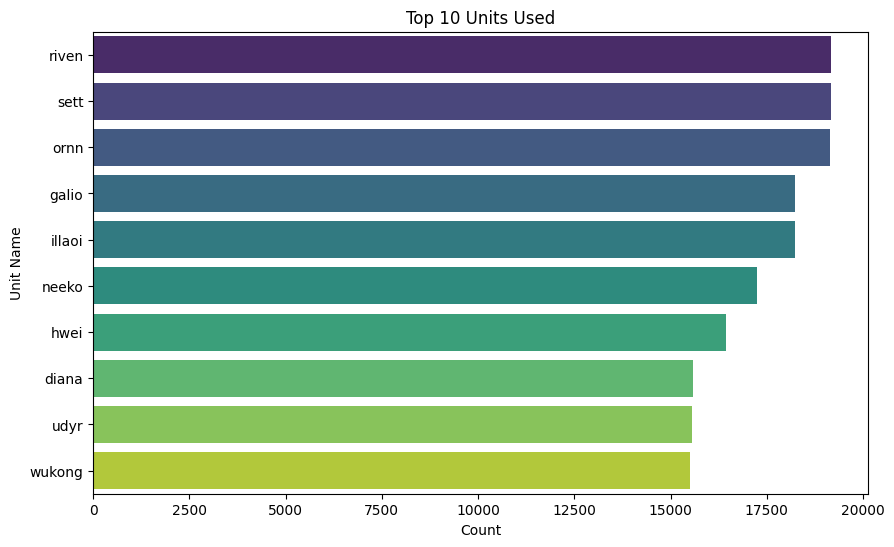

In [15]:
# Plot the top 10 units
top_10_units = units.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_units.values, y=top_10_units.index, hue=top_10_units.index, palette="viridis")
plt.title('Top 10 Units Used')
plt.xlabel('Count')
plt.ylabel('Unit Name')
plt.show()

In [16]:
# Create a DataFrame with unit names and their corresponding placements
unit_placements = []

for unit_col in unit_columns:
    unit_data = df[[unit_col, 'placement']].dropna()
    unit_data.columns = ['unit_name', 'placement']
    unit_placements.append(unit_data)

unit_placements_df = pd.concat(unit_placements)

# Calculate the average placement for each unit
avg_placement_per_unit = unit_placements_df.groupby('unit_name')['placement'].mean().sort_values()

/var/folders/yb/pc16vj9d6xxg52f7cndghv6r0000gn/T/ipykernel_20290/3143353654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placement', y='unit_name', data=top_10_units_placements, palette="viridis", order=top_10_units_names)


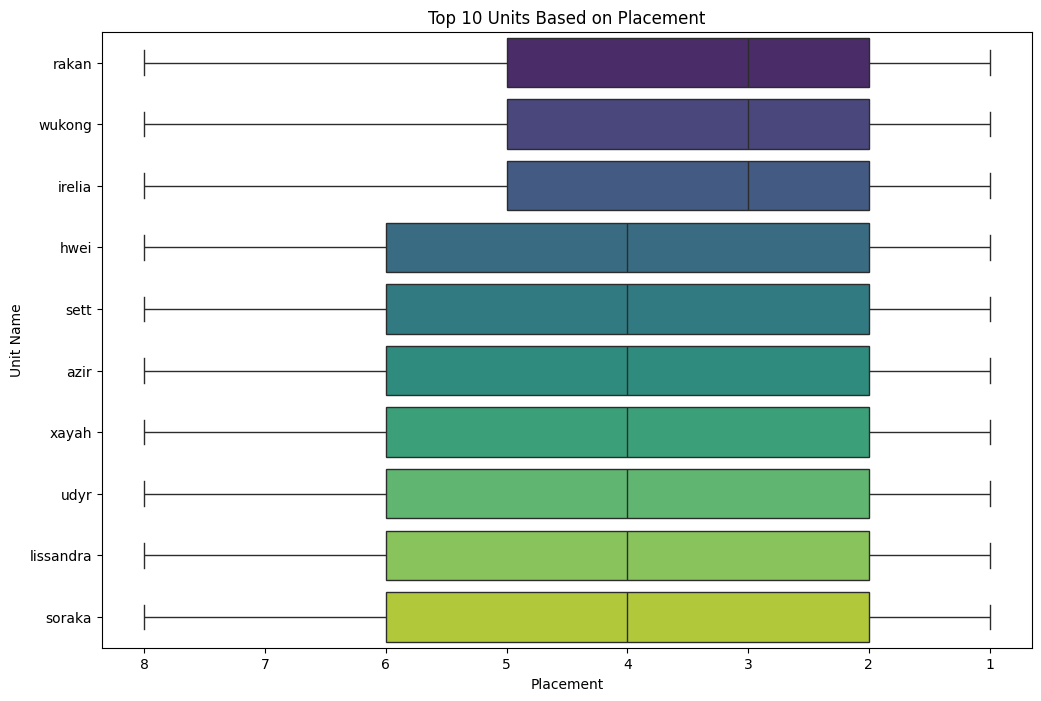

In [17]:
# Select the top 10 units based on average placement
top_10_units_names = avg_placement_per_unit.head(10).index

# Filter the DataFrame for these units
top_10_units_placements = unit_placements_df[unit_placements_df['unit_name'].isin(top_10_units_names)]

# Plot the distribution of placements for the top 10 units using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='placement', y='unit_name', data=top_10_units_placements, palette="viridis", order=top_10_units_names)
plt.title('Top 10 Units Based on Placement')
plt.xlabel('Placement')
plt.ylabel('Unit Name')
plt.gca().invert_xaxis()  # Invert x-axis to show best placements on the right
plt.show()


In [18]:
# Extract item columns from the dataset
item_columns = [col for col in df.columns if 'item_' in col]

# Count the occurrences of each item
items = df[item_columns].apply(pd.Series.value_counts).fillna(0).sum(axis=1).sort_values(ascending=False)

# Summary statistics for items in the units columns
items_summary_stats = df[item_columns].describe(include='all')
items_na_stats = df[item_columns].isnull().sum()

# Display the summary and missing values for items
items_summary_stats, items_na_stats


(            unit_1_item_1      unit_1_item_2      unit_1_item_3  \
 count               49990              40325              31915   
 unique                138                138                136   
 top     guinsoosrageblade  guinsoosrageblade  guinsoosrageblade   
 freq                 3664               3066               3648   
 mean                  NaN                NaN                NaN   
 std                   NaN                NaN                NaN   
 min                   NaN                NaN                NaN   
 25%                   NaN                NaN                NaN   
 50%                   NaN                NaN                NaN   
 75%                   NaN                NaN                NaN   
 max                   NaN                NaN                NaN   
 
             unit_2_item_1      unit_3_item_1      unit_3_item_2  \
 count               49959              48959              37573   
 unique                138                138 

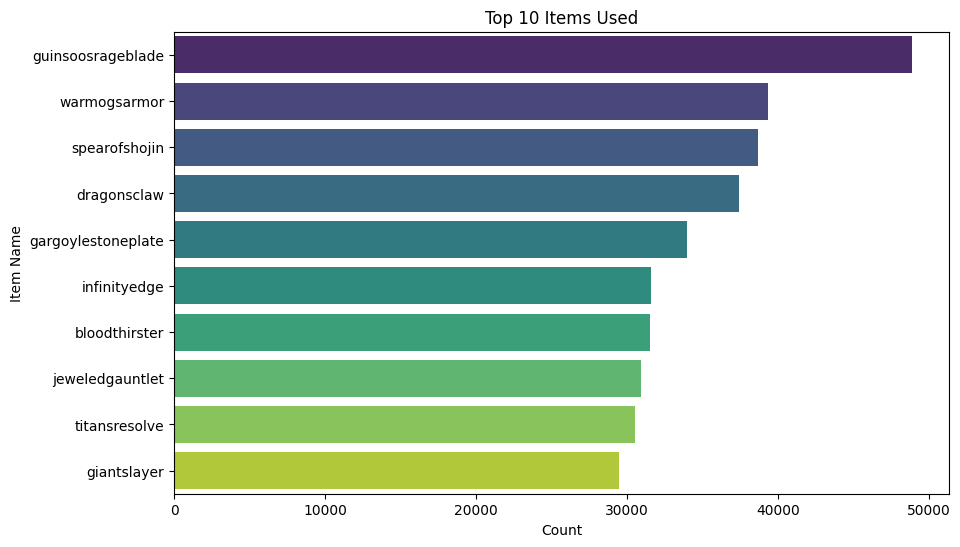

In [19]:
# Plot the top 10 items
top_10_items = items.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.values, y=top_10_items.index, hue=top_10_items.index, palette="viridis")
plt.title('Top 10 Items Used')
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.show()


In [20]:
# Create a DataFrame with item names and their corresponding placements
item_placements = []

for item_col in item_columns:
    item_data = df[[item_col, 'placement']].dropna()
    item_data.columns = ['item_name', 'placement']
    item_placements.append(item_data)

item_placements_df = pd.concat(item_placements)

# Calculate the average placement for each item
avg_placement_per_item = item_placements_df.groupby('item_name')['placement'].mean().sort_values()

/var/folders/yb/pc16vj9d6xxg52f7cndghv6r0000gn/T/ipykernel_20290/1918516167.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placement', y='item_name', data=top_10_items_placements, palette="viridis", order=top_10_items_names)


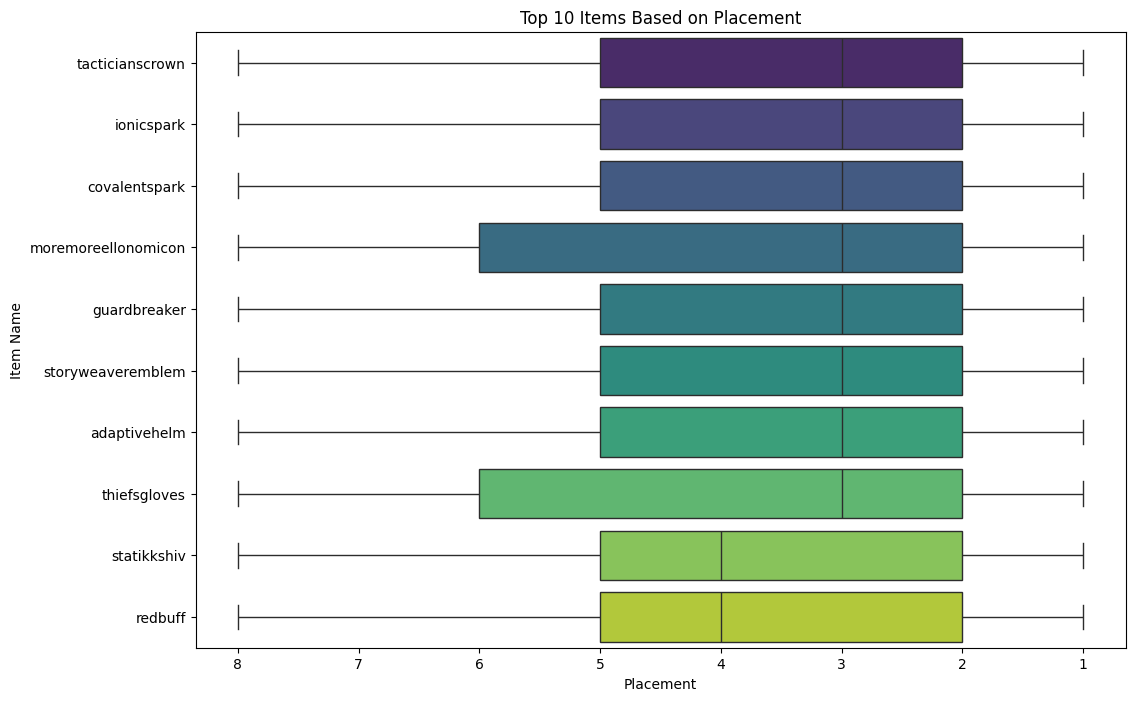

In [21]:
# Select the top 10 items based on average placement
top_10_items_names = avg_placement_per_item.head(10).index

# Filter the DataFrame for these items
top_10_items_placements = item_placements_df[item_placements_df['item_name'].isin(top_10_items_names)]

# Plot the distribution of placements for the top 10 items using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='placement', y='item_name', data=top_10_items_placements, palette="viridis", order=top_10_items_names)
plt.title('Top 10 Items Based on Placement')
plt.xlabel('Placement')
plt.ylabel('Item Name')
plt.gca().invert_xaxis()  # Invert x-axis to show best placements on the right
plt.show()


In [22]:
# Create a DataFrame with unit-item combinations and their corresponding placements
unit_item_placements = []

for unit_col in unit_columns:
    for i in range(1, 4):  # There are 3 item slots per unit
        item_col = unit_col.replace('name', f'item_{i}')
        combination_data = df[[unit_col, item_col, 'placement']].dropna()
        combination_data.columns = ['unit_name', 'item_name', 'placement']
        unit_item_placements.append(combination_data)

unit_item_placements_df = pd.concat(unit_item_placements)

KeyError: "['unit_14_item_2'] not in index"

/var/folders/yb/pc16vj9d6xxg52f7cndghv6r0000gn/T/ipykernel_6596/360671638.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='average_placement', y=top_10_combinations_count['unit_name'] + ' + ' + top_10_combinations_count['item_name'],


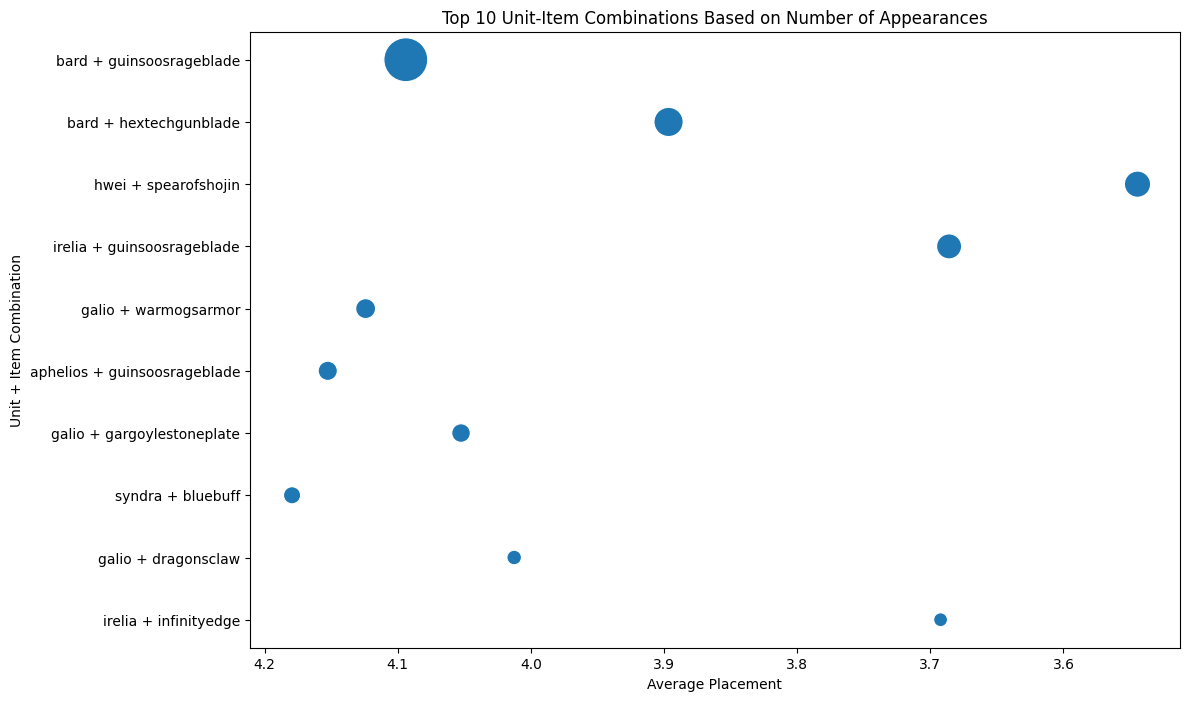

In [37]:
# Calculate the number of appearances and average placement for each unit-item combination
unit_item_combinations = unit_item_placements_df.groupby(['unit_name', 'item_name']).agg({
    'placement': ['mean', 'count']
}).reset_index()

# Rename columns for better readability
unit_item_combinations.columns = ['unit_name', 'item_name', 'average_placement', 'count']

# Select top 10 combinations based on the number of appearances
top_10_combinations_count = unit_item_combinations.sort_values(by='count', ascending=False).head(10)

# Plot the top 10 combinations based on the number of appearances
plt.figure(figsize=(12, 8))
sns.scatterplot(x='average_placement', y=top_10_combinations_count['unit_name'] + ' + ' + top_10_combinations_count['item_name'], 
                size='count', sizes=(100, 1000), data=top_10_combinations_count, legend=False, palette="viridis", marker='o', edgecolor='w')
plt.title('Top 10 Unit-Item Combinations Based on Number of Appearances')
plt.xlabel('Average Placement')
plt.ylabel('Unit + Item Combination')
plt.gca().invert_xaxis()  # Invert x-axis to show best placements on the right
plt.show()


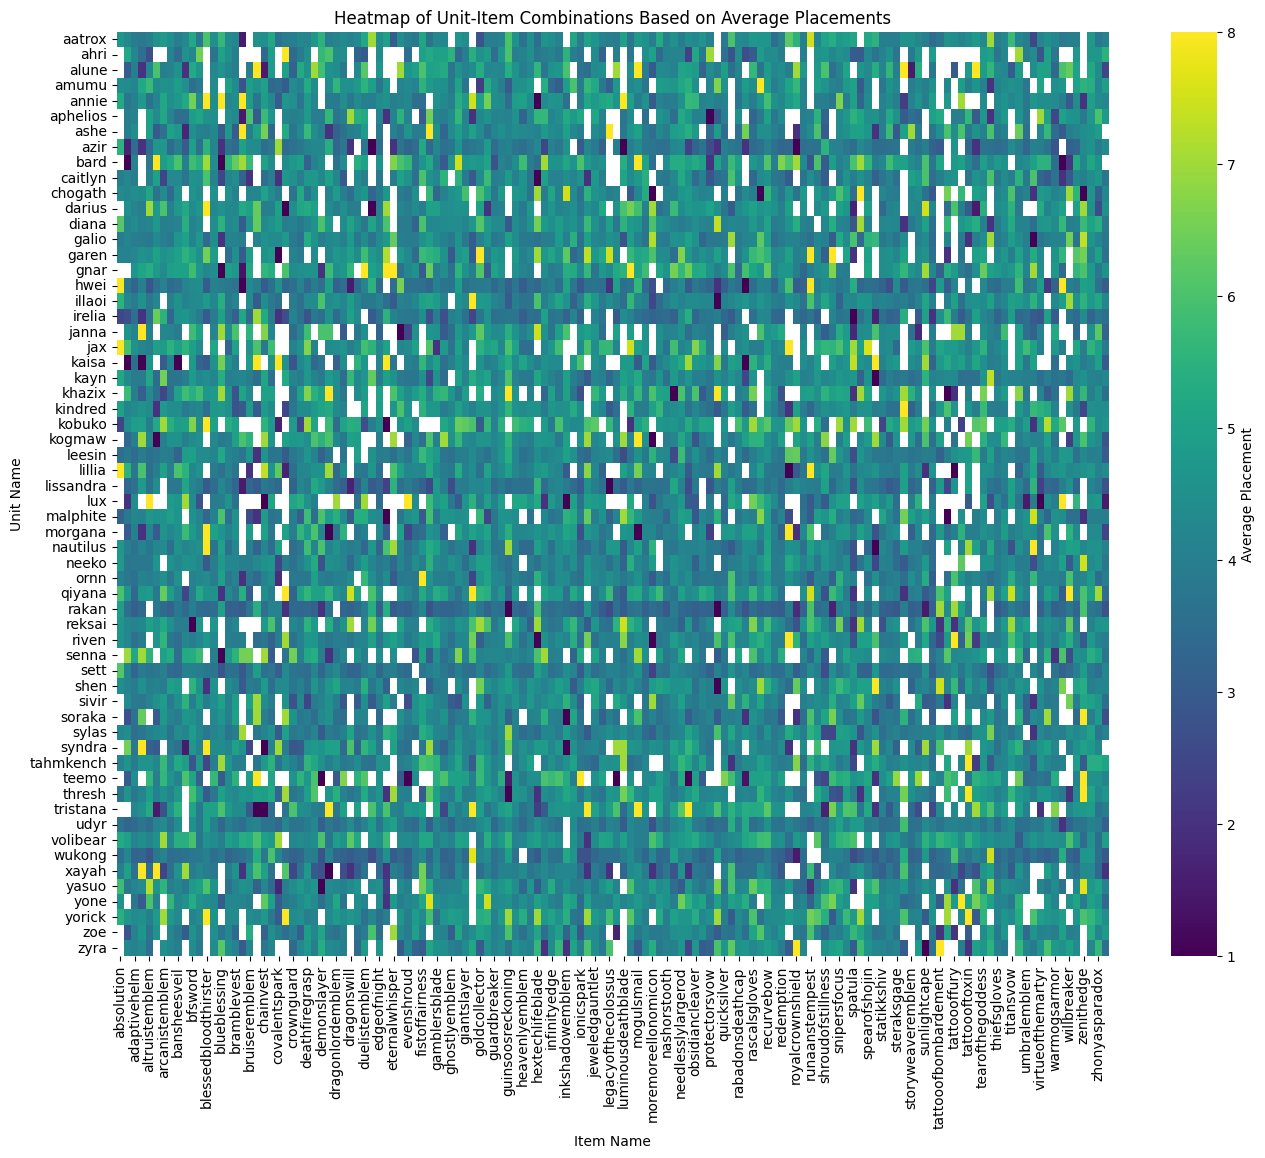

In [45]:
# Create a pivot table for the heatmap
pivot_table = unit_item_combinations.pivot_table(values='average_placement', index='unit_name', columns='item_name')

# Plot the heatmap without annotations for clearer visualization
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Average Placement'})
plt.title('Heatmap of Unit-Item Combinations Based on Average Placements')
plt.xlabel('Item Name')
plt.ylabel('Unit Name')
plt.show()



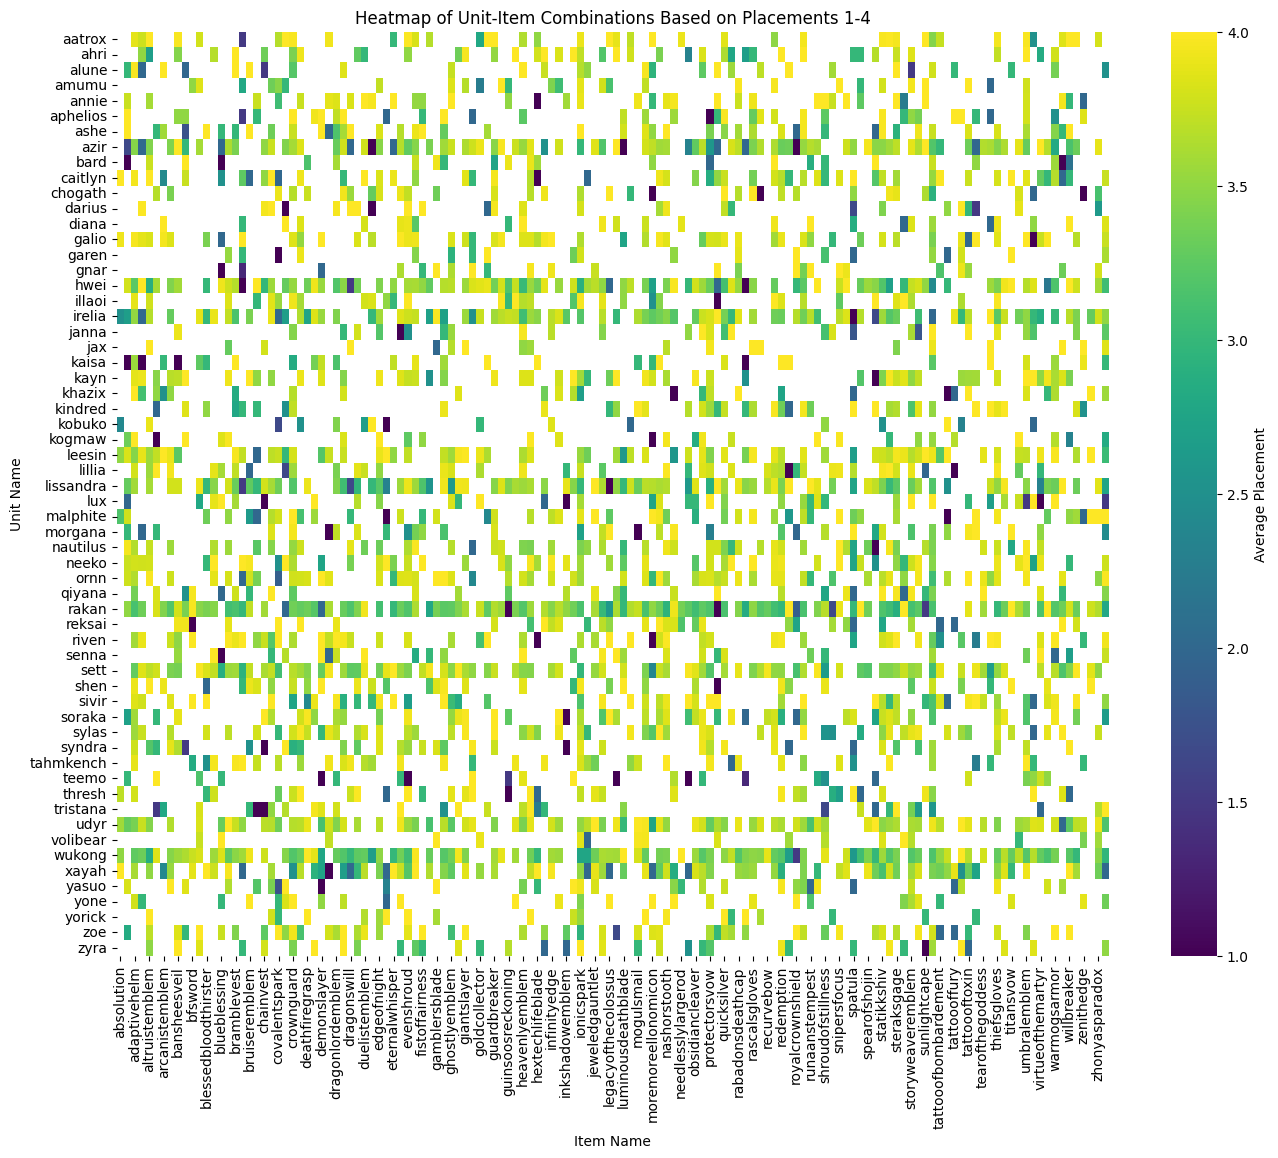

In [49]:
# Filter combinations for placements 1-4
filtered_combinations = unit_item_combinations[unit_item_combinations['average_placement'] <= 4]

# Create a pivot table for the heatmap with filtered combinations
filtered_pivot_table = filtered_combinations.pivot_table(values='average_placement', index='unit_name', columns='item_name')

# Remove rows and columns with all NaN values
top_4_filtered_pivot_table = filtered_pivot_table.dropna(how='all').dropna(axis=1, how='all')

# Plot the heatmap with filtered combinations
plt.figure(figsize=(16, 12))
sns.heatmap(top_4_filtered_pivot_table, cmap='viridis', cbar_kws={'label': 'Average Placement'})
plt.title('Heatmap of Unit-Item Combinations Based on Placements 1-4')
plt.xlabel('Item Name')
plt.ylabel('Unit Name')
plt.show()


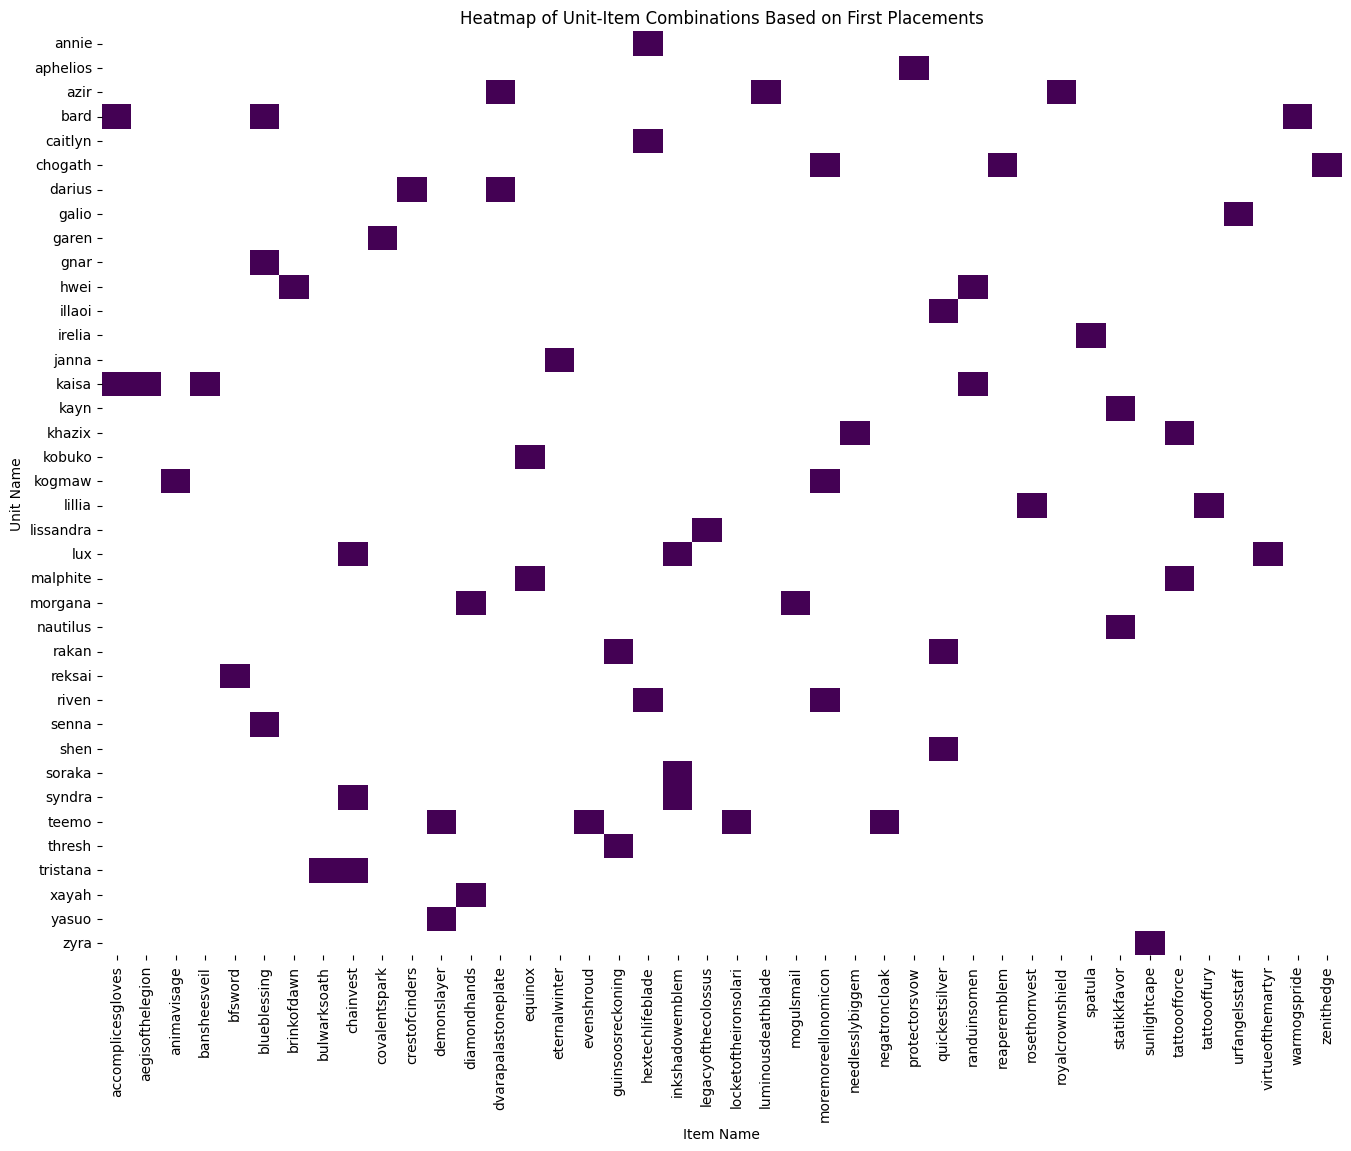

In [51]:
# Filter combinations for only first placements
first_place_combinations = unit_item_combinations[unit_item_combinations['average_placement'] == 1]

# Create a pivot table for the heatmap with first place combinations
first_place_pivot_table = first_place_combinations.pivot_table(values='average_placement', index='unit_name', columns='item_name')

# Remove rows and columns with all NaN values
first_place_pivot_table = first_place_pivot_table.dropna(how='all').dropna(axis=1, how='all')

# Plot the heatmap without the color bar
plt.figure(figsize=(16, 12))
sns.heatmap(first_place_pivot_table, cmap='viridis', cbar=False)
plt.title('Heatmap of Unit-Item Combinations Based on First Placements')
plt.xlabel('Item Name')
plt.ylabel('Unit Name')
plt.show()